# Preprocessing

### Import Data

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Load data
wine = pd.read_csv(url, header=None)

# Define the column names
columns = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

wine.columns = columns

# Output the dataframe to verify
wine


Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

All of the data is already numerical and there are no missing values, so that data is already clean. Next, we'll plot the attributes to determine which ones may be useful in identifying class.

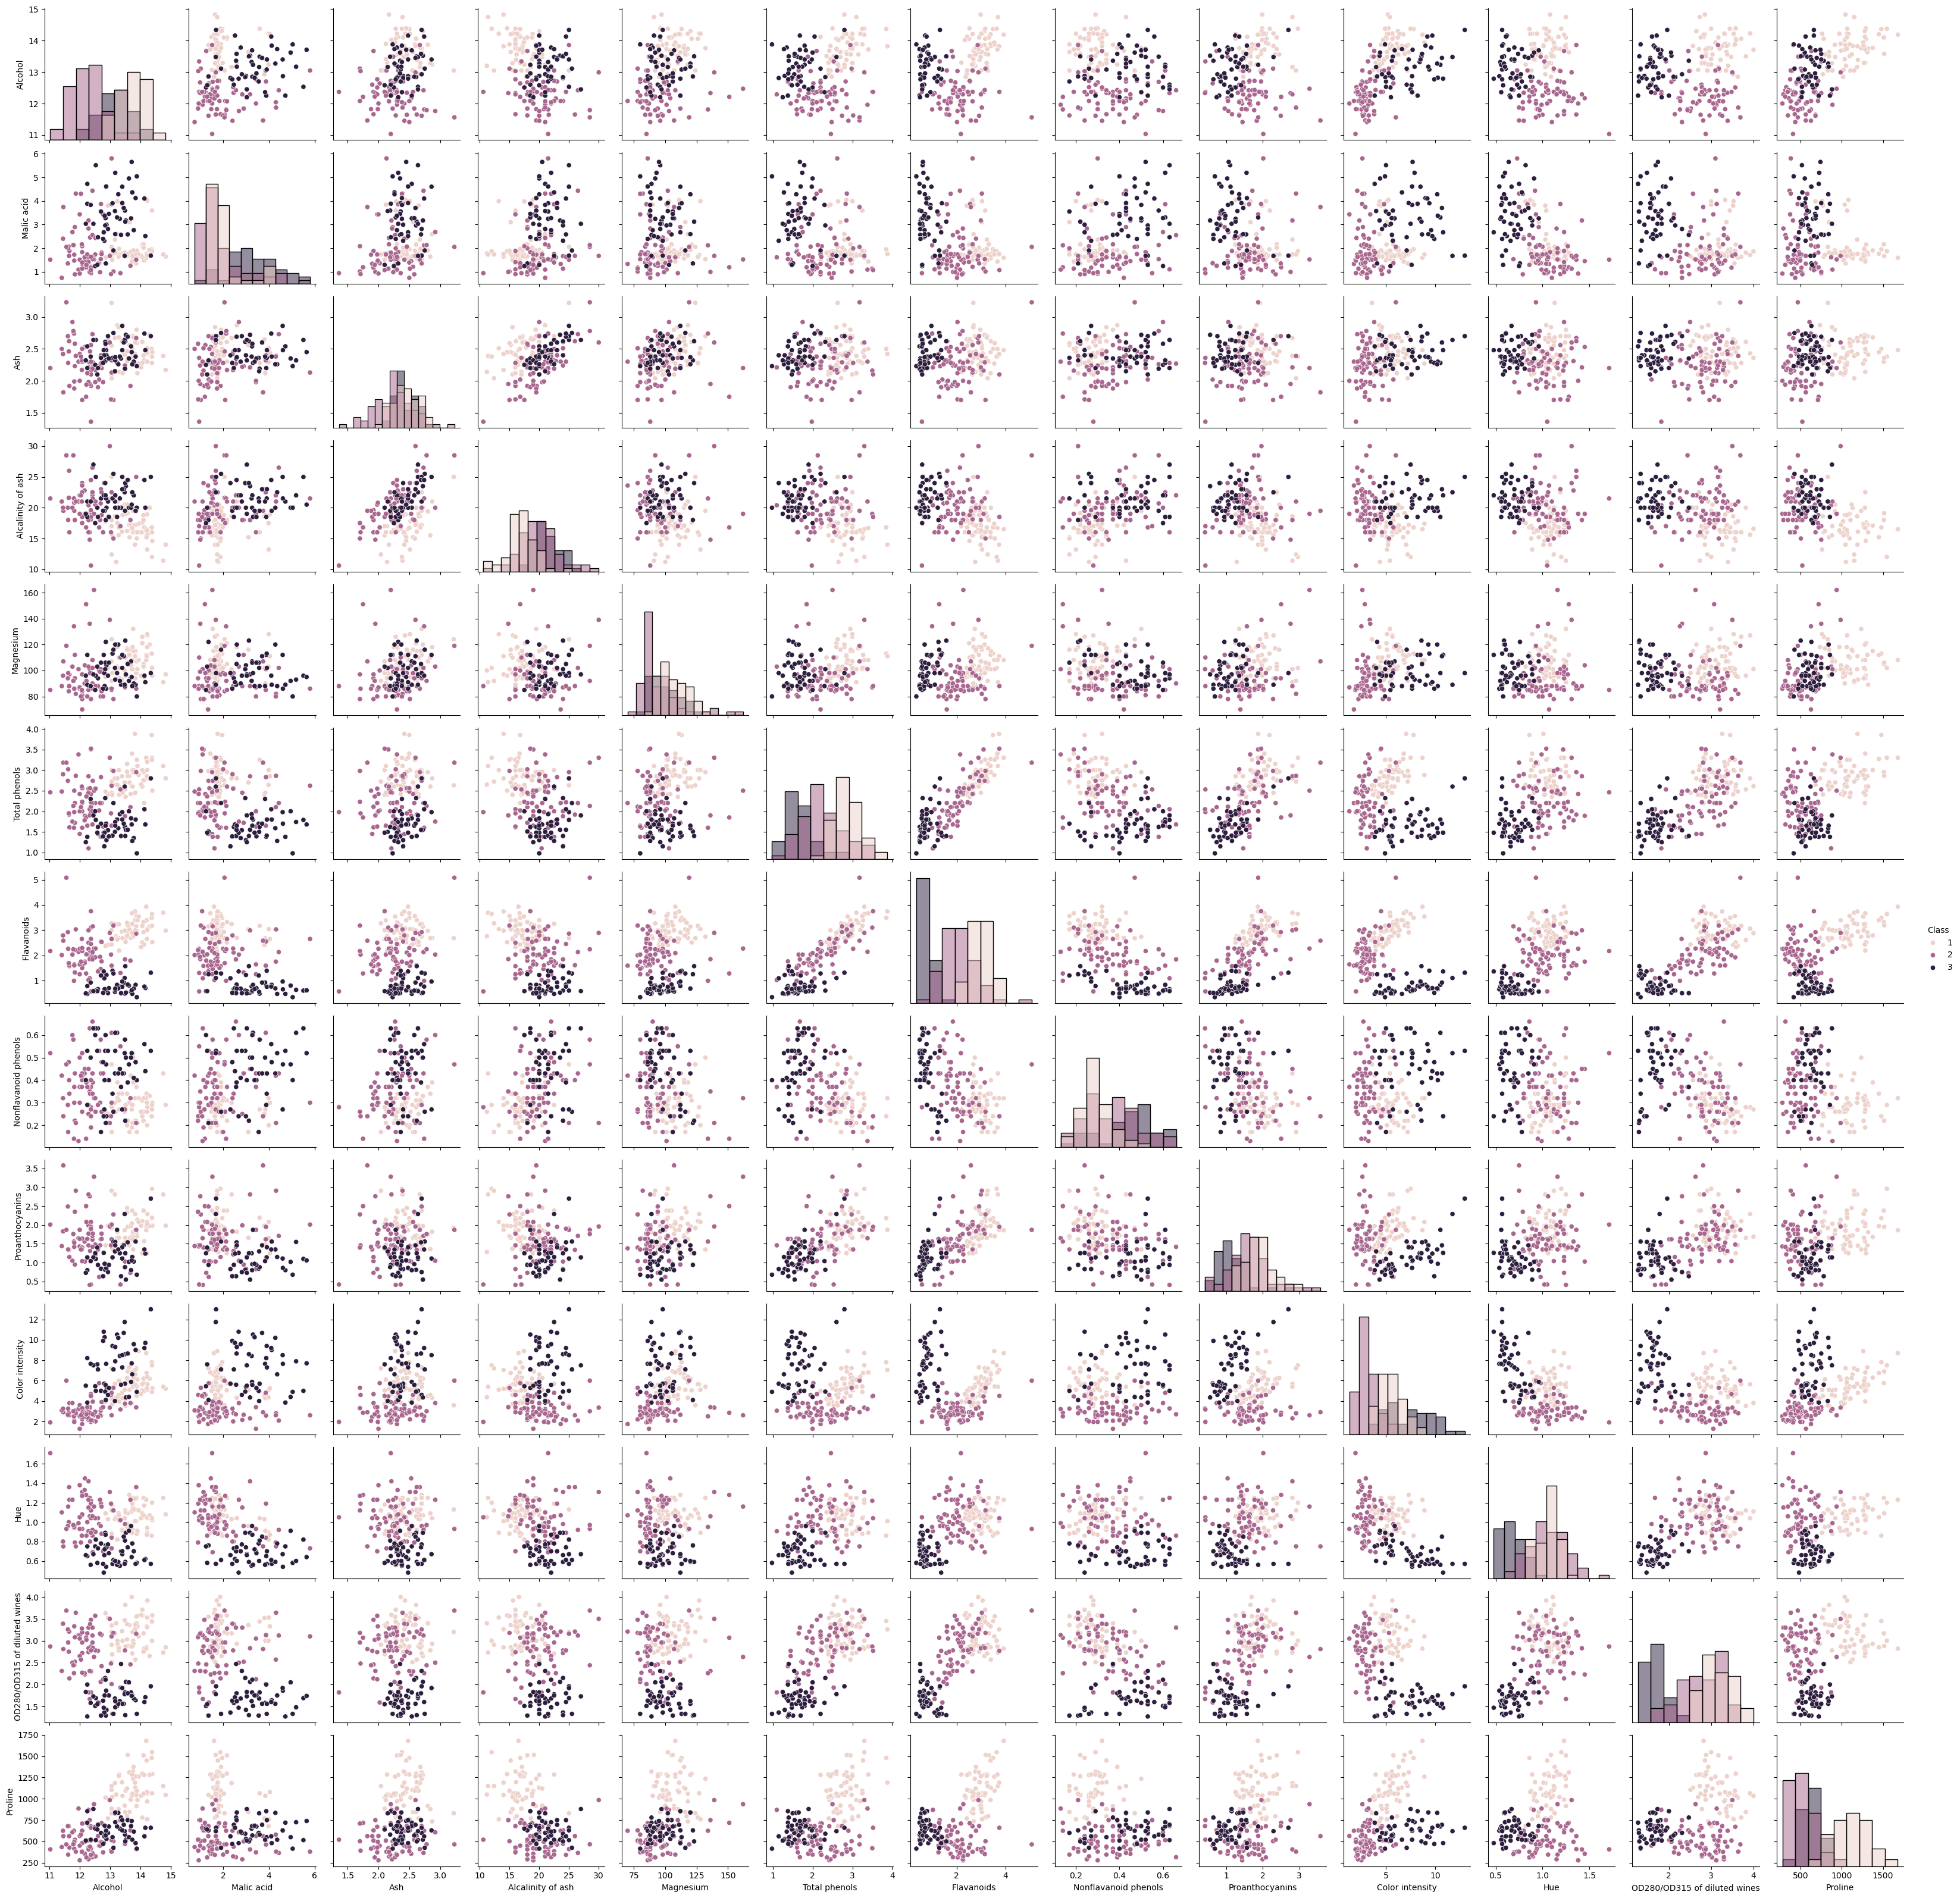

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def examine_wine(wine):
    attribs = [
        "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
        "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
        "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
    ]

    # Plot the pair grid
    g = sns.PairGrid(wine[attribs], hue="Class")
    g.map_diag(sns.histplot)
    g.map_offdiag(sns.scatterplot)
    g.add_legend()
    return g

examine_wine(wine)
plt.show()

Based on these plots, `Malic acid`, `Ash`, `Alcalinity of ash`, `Magnesium`, and `Nonflavanoid phenols` don't separate into classes well or contain mostly noisy data, so these features can be exluded. The features that seem to separate the best are `Alcohol`, `Flavanoids`, `Color intensity`, `OD280/OD315 of diluted wines`, and `Proline`. These features will be included in the final preprocessed data set. We will determine which of these features produces the strongest class predictor model.

## Create preprocessed CSV file to be used in the next step

In [ ]:
best_features = [
    "Class",
    "Alcohol",
    "Flavanoids",
    "Color intensity",
    "OD280/OD315 of diluted wines",
    "Proline"
]
preprocessed_wine = wine[best_features]

# Save to CSV
preprocessed_wine.to_csv("preprocessed_wine.csv", index=False)